In [1]:
library(readr)
library(ggplot2)
library(RColorBrewer)
library(svglite)

In [3]:
#metadata
metadata <- read.csv('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/metadata/metadata_format_mouse.csv', header = TRUE)

In [138]:
#score dataframes
complete <- read.csv('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/final_scores/complete_dataset_scores.csv', header = TRUE)
cell_500 <- read.csv('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/final_scores/cell_500_scores.csv', header = TRUE)
CpG <- read.csv('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/final_scores/CpG_10_scores.csv', header = TRUE)

complete$condition = tolower(complete$condition)
cell_500$condition = tolower(cell_500$condition)
CpG$condition = tolower(CpG$condition)

In [139]:
#for plotting
complete_plot <- subset(complete, value != 'm value(methylation fraction)')
cell500_plot <- subset(cell_500, value != 'm value(methylation fraction)')
CpG10_plot <- subset(CpG, value != 'm value(methylation fraction)')

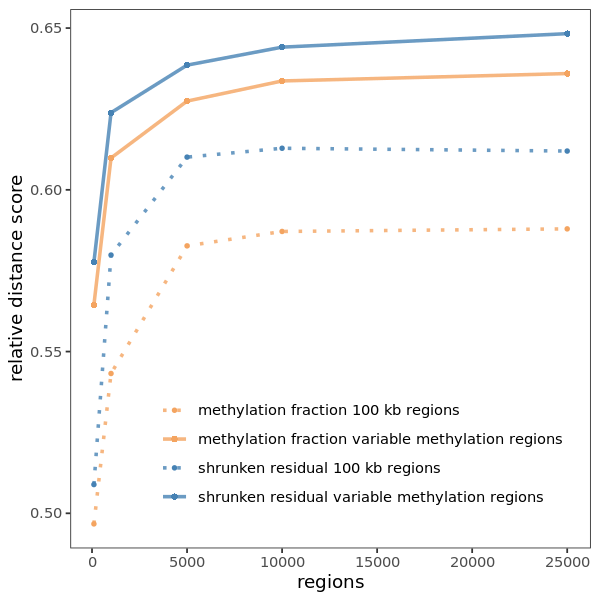

In [146]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(cell500_plot, aes(x = regions, y = X0, linetype = condition, color = condition, shape = condition))+

    geom_line(alpha = 0.8, size = 1)+
    scale_linetype_manual(values=c("dotted","solid","dotted", "solid"))+
    geom_point()+
    labs(x = 'regions', y = 'relative distance score', color = '')+
    scale_color_manual(values = c('sandybrown', 'sandybrown', 'steelblue', 'steelblue'))+
    scale_shape_manual(values = c(20, 16, 20, 16))+
    labs(color = '', linetype = '', shape = '')+

# Sets the default ggplot2 theme
    theme_set(theme_bw() + theme(text = element_text(family = 'Arial'),
                             panel.grid.minor = element_blank(),  # remove axis grid
                             panel.grid.major = element_blank(),
                             strip.background = element_blank(),  # remove silly gray bg of facet title
                             strip.text = element_text(hjust = 0), # left-justify facets
                             plot.tag = element_text(size = 20, face = "bold"),
                            legend.position = c(0.55, 0.2)
))
#ggsave('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/final_scores/cell500_dataset_10cm.svg', width = 12, height = 12, units = 'cm')


In [8]:
#umaps, 5000 regions

complete_5000_100kb_meth <- read.csv('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/100kb/pca_umap_20/5000_meth_frac_none_100kb_20PCAUMAP.csv', header = TRUE)
complete_5000_100kb_shrunk <- read.csv('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/100kb/pca_umap_20/5000_shrunken_residual_none_100kb_20PCAUMAP.csv', header = TRUE)
complete_5000_var_meth <- read.csv('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/varregions/pca_umap_20/5000_meth_frac_none_var_20PCAUMAP.csv', header = TRUE)
complete_5000_var_shrunk <- read.csv('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/varregions/pca_umap_20/5000_shrunken_residual_none_var_20PCAUMAP.csv', header = TRUE)

complete_5000_100kb_meth <-merge(x = complete_5000_100kb_meth, y = metadata[, c('Sample', 'Neuron.type')], by.x = 'cell_name', by.y = 'Sample', all.x = TRUE)
complete_5000_100kb_shrunk <-merge(x = complete_5000_100kb_shrunk, y = metadata[, c('Sample', 'Neuron.type')], by.x = 'cell_name', by.y = 'Sample', all.x = TRUE)
complete_5000_var_meth <-merge(x = complete_5000_var_meth, y = metadata[, c('Sample', 'Neuron.type')], by.x = 'cell_name', by.y = 'Sample', all.x = TRUE)
complete_5000_var_shrunk <-merge(x = complete_5000_var_shrunk , y = metadata[, c('Sample', 'Neuron.type')], by.x = 'cell_name', by.y = 'Sample', all.x = TRUE)



In [9]:
excit_list = c('mDL-1', 'mDL-2', 'mDL-3','mL2/3','mL4', 'mL5-1', 'mL5-2', 'mL6-1', 'mL6-2', 'mIn-1')
inhib_list = c('mNdnf-1', 'mNdnf-2', 'mVip', 'mPv', 'mSst-1', 'mSst-2')

In [148]:
theme_set(theme_bw() + theme(text = element_text(family = 'Arial'),
                             panel.grid.minor = element_blank(),  # remove axis grid
                             panel.grid.major = element_blank(),
                             strip.background = element_blank(),  # remove silly gray bg of facet title
                             strip.text = element_text(hjust = 0), # left-justify facets
                             plot.tag = element_text(size = 20, face = "bold"),
                            #legend.position = c(0.55, 0.2)
))

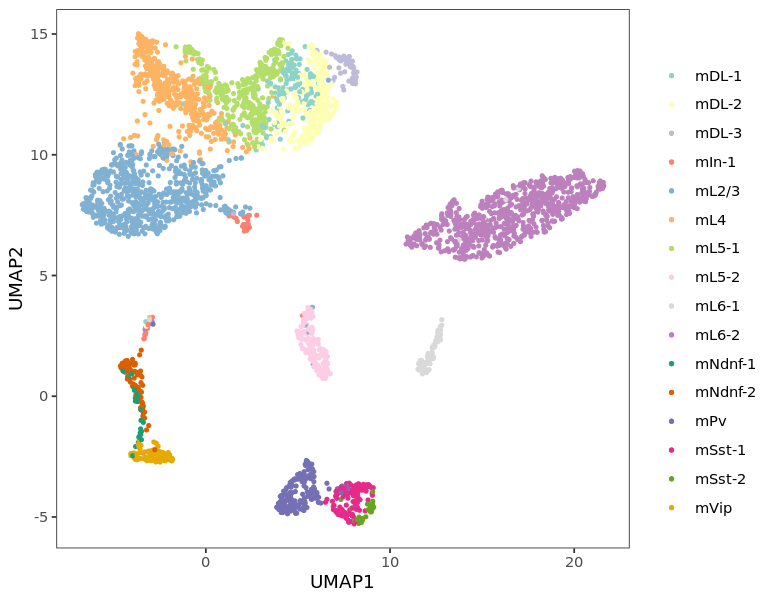

In [173]:
#5000 region plot for complete dateset, 100kb regions
options(repr.plot.width=6.5, repr.plot.height=5)
mypal <- colorRampPalette(brewer.pal(10, "Set3"))
mypal2 <- colorRampPalette(brewer.pal(6, "Dark2"))
ggplot()+
geom_point(data = complete_5000_100kb_meth[complete_5000_100kb_meth$Neuron.type %in% excit_list,] , aes(x = UMAP9, y = UMAP10, color = Neuron.type), size = 0.8)+
geom_point(data = complete_5000_100kb_meth[complete_5000_100kb_meth$Neuron.type %in% inhib_list,], aes(x = UMAP9, y = UMAP10, color = Neuron.type), size = 0.8)+
labs(x = 'UMAP1', y = 'UMAP2', color = '') +
scale_colour_manual(values = c(mypal(10), mypal2(6)))

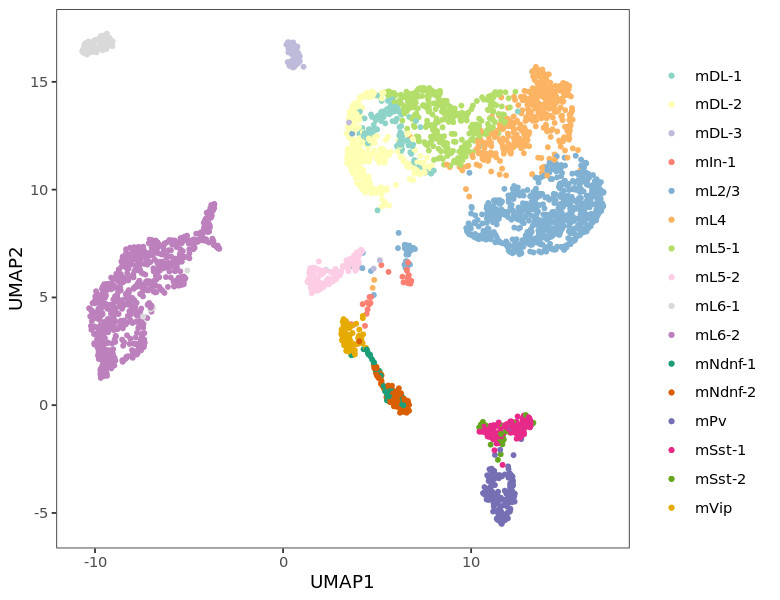

In [164]:
#5000 region plot for complete dateset, variable methylation regions
ggplot()+
geom_point(data = complete_5000_var_shrunk[complete_5000_var_shrunk$Neuron.type %in% excit_list,] , aes(x = UMAP19, y = UMAP20, color = Neuron.type), size = 1)+
geom_point(data = complete_5000_var_shrunk[complete_5000_var_shrunk$Neuron.type %in% inhib_list,], aes(x = UMAP19, y = UMAP20, color = Neuron.type), size = 1)+
labs(x = 'UMAP1', y = 'UMAP2', color = '') +
scale_colour_manual(values = c(mypal(10), mypal2(6)))

In [151]:
#umaps 1000 regions
complete_1000_100kb_meth <- read.csv('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/100kb/pca_umap_20/1000_meth_frac_none_100kb_20PCAUMAP.csv', header = TRUE)
complete_1000_100kb_shrunk <- read.csv('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/100kb/pca_umap_20/1000_shrunken_residual_none_100kb_20PCAUMAP.csv', header = TRUE)
complete_1000_var_meth <- read.csv('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/varregions/pca_umap_20/1000_meth_frac_none_var_20PCAUMAP.csv', header = TRUE)
complete_1000_var_shrunk <- read.csv('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/varregions/pca_umap_20/1000_shrunken_residual_none_var_20PCAUMAP.csv', header = TRUE)

complete_1000_100kb_meth <-merge(x = complete_1000_100kb_meth, y = metadata[, c('Sample', 'Neuron.type')], by.x = 'cell_name', by.y = 'Sample', all.x = TRUE)
complete_1000_100kb_shrunk <-merge(x = complete_1000_100kb_shrunk, y = metadata[, c('Sample', 'Neuron.type')], by.x = 'cell_name', by.y = 'Sample', all.x = TRUE)
complete_1000_var_meth <-merge(x = complete_1000_var_meth, y = metadata[, c('Sample', 'Neuron.type')], by.x = 'cell_name', by.y = 'Sample', all.x = TRUE)
complete_1000_var_shrunk <-merge(x = complete_1000_var_shrunk , y = metadata[, c('Sample', 'Neuron.type')], by.x = 'cell_name', by.y = 'Sample', all.x = TRUE)


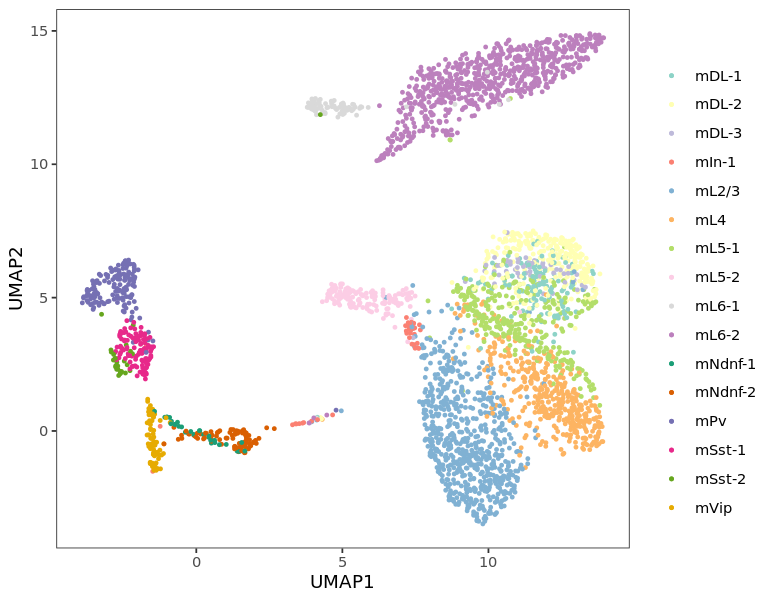

In [176]:
#1000 region plot for complete dateset, 100kb regions
ggplot()+
geom_point(data = complete_1000_100kb_meth[complete_1000_100kb_meth$Neuron.type %in% excit_list,] , aes(x = UMAP1, y = UMAP2, color = Neuron.type), size = 0.7)+
geom_point(data = complete_1000_100kb_meth[complete_1000_100kb_meth$Neuron.type %in% inhib_list,], aes(x = UMAP1, y = UMAP2, color = Neuron.type), size = 0.7)+
labs(x = 'UMAP1', y = 'UMAP2', color = '') +
scale_colour_manual(values = c(mypal(10), mypal2(6)))
#ggsave('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/final_scores/1000_100kb_methfrac.svg', width = 13, height =11, units = 'cm')


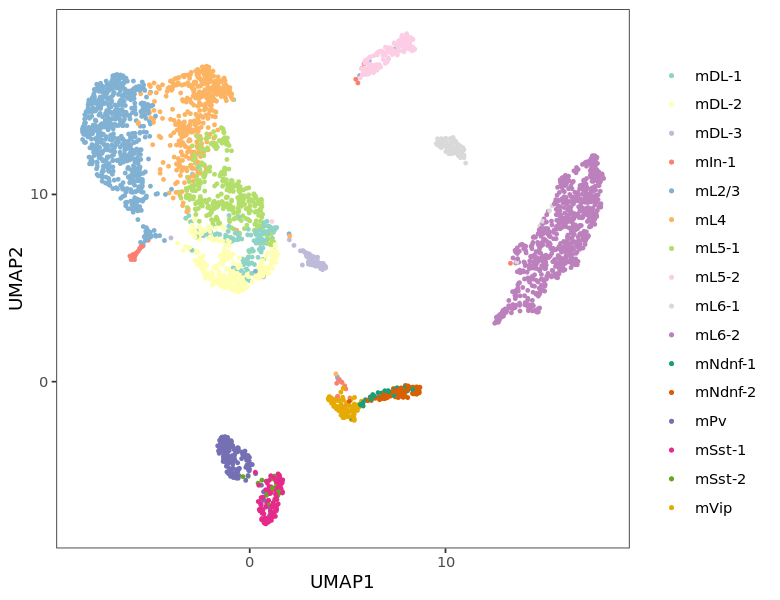

In [177]:
#1000 region plot for complete dateset, variable methylation regions
ggplot()+
geom_point(data = complete_1000_var_shrunk[complete_1000_var_shrunk$Neuron.type %in% excit_list,] , aes(x = UMAP1, y = UMAP2, color = Neuron.type), size = 0.7)+
geom_point(data = complete_1000_var_shrunk[complete_1000_var_shrunk$Neuron.type %in% inhib_list,], aes(x = UMAP1, y = UMAP2, color = Neuron.type), size = 0.7)+
labs(x = 'UMAP1', y = 'UMAP2', color = '') +
scale_colour_manual(values = c(mypal(10), mypal2(6)))
#ggsave('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/final_scores/1000_var_shrunken_residual.svg', width = 13, height =11, units = 'cm')


In [20]:
#umaps 1000 regions, 500 cells
cell500_1000_100kb_meth <- read.csv('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/100kb/cells_500/pca_umap_20/1000_meth_frac_none_100kb_20PCAUMAP.csv', header = TRUE)
cell500_1000_100kb_shrunk <- read.csv('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/100kb/cells_500/pca_umap_20/1000_shrunken_residual_none_100kb_20PCAUMAP.csv', header = TRUE)
cell500_1000_var_meth <- read.csv('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/varregions/cells_500/pca_umap_20/1000_meth_frac_none_var_20PCAUMAP.csv', header = TRUE)
cell500_1000_var_shrunk <- read.csv('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/varregions/cells_500/pca_umap_20/1000_shrunken_residual_none_var_20PCAUMAP.csv', header = TRUE)

cell500_1000_100kb_meth <-merge(x = cell500_1000_100kb_meth, y = metadata[, c('Sample', 'Neuron.type')], by.x = 'cell_name', by.y = 'Sample', all.x = TRUE)
cell500_1000_100kb_shrunk <-merge(x = cell500_1000_100kb_shrunk, y = metadata[, c('Sample', 'Neuron.type')], by.x = 'cell_name', by.y = 'Sample', all.x = TRUE)
cell500_1000_var_meth <-merge(x = cell500_1000_var_meth, y = metadata[, c('Sample', 'Neuron.type')], by.x = 'cell_name', by.y = 'Sample', all.x = TRUE)
cell500_1000_var_shrunk <-merge(x = cell500_1000_var_shrunk , y = metadata[, c('Sample', 'Neuron.type')], by.x = 'cell_name', by.y = 'Sample', all.x = TRUE)


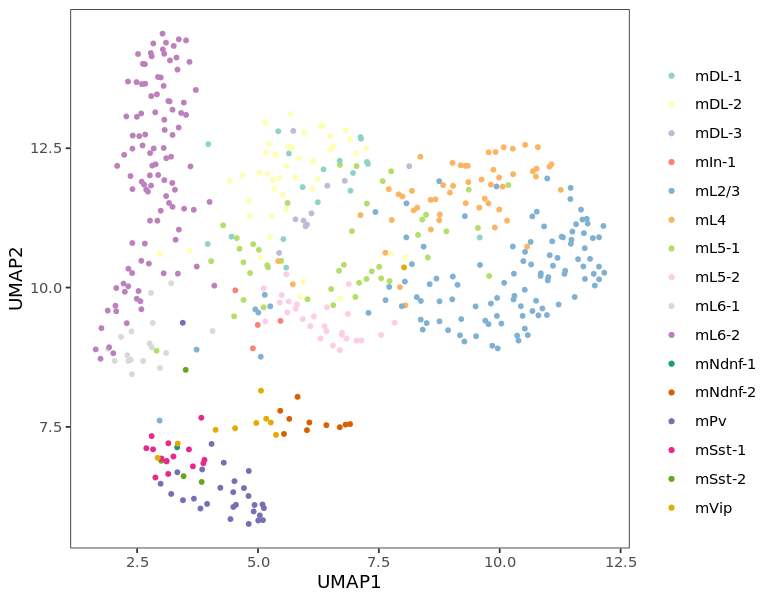

In [167]:
#1000 region plot for 500 cell dateset, 100kb regions
ggplot()+
geom_point(data = cell500_1000_100kb_meth[cell500_1000_100kb_meth$Neuron.type %in% excit_list,] , aes(x = UMAP1, y = UMAP2, color = Neuron.type), size = 1)+
geom_point(data = cell500_1000_100kb_meth[cell500_1000_100kb_meth$Neuron.type %in% inhib_list,], aes(x = UMAP1, y = UMAP2, color = Neuron.type), size = 1)+
labs(x = 'UMAP1', y = 'UMAP2', color = '') +
scale_colour_manual(values = c(mypal(10), mypal2(6)))
#ggsave('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/final_scores/cell_500_1000_100kb_methfrac.svg', width = 13, height =11, units = 'cm')


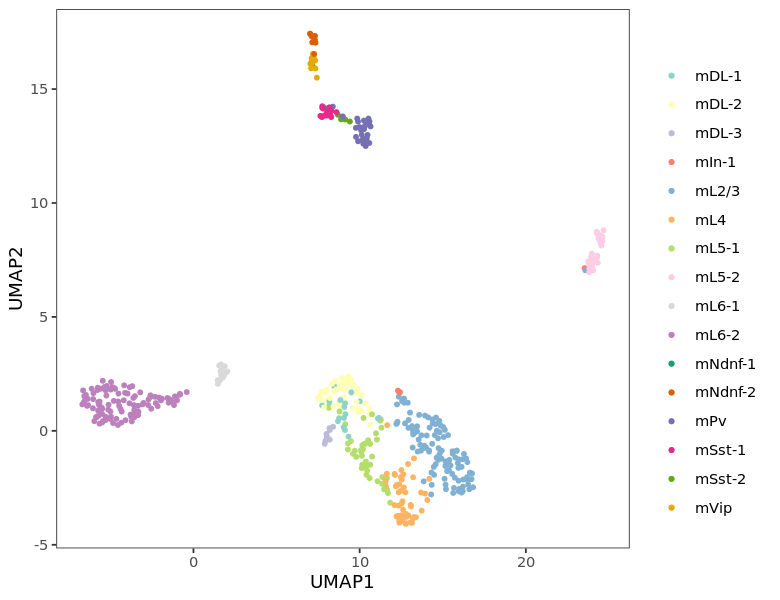

In [168]:
#1000 region plot for 500 cell dateset, variable methylation regions
ggplot()+
geom_point(data = cell500_1000_var_shrunk[cell500_1000_var_shrunk$Neuron.type %in% excit_list,] , aes(x = UMAP1, y = UMAP2, color = Neuron.type), size = 1)+
geom_point(data = cell500_1000_var_shrunk[cell500_1000_var_shrunk$Neuron.type %in% inhib_list,], aes(x = UMAP1, y = UMAP2, color = Neuron.type), size = 1)+
labs(x = 'UMAP1', y = 'UMAP2', color = '') +
scale_colour_manual(values = c(mypal(10), mypal2(6)))
#ggsave('/mnt/o_drive/Leonie_K/20200407_neuro_subtypes/mouse/umaps/final_scores/cell_500_1000_var_shrunken_residual.svg', width = 13, height =11, units = 'cm')
